ESERCIZIO 2 "HORIZON TILING OF THE SKY"

PRIMA FACCIO I CALCOLI IN UNIVERSO CON ORIZZONTE GENERICO (modello LambdaCDM)

In [1]:
import camb as camb
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as spi
from scipy.constants import c  #c in m/s
import sys
sys.path.append("../")

In [2]:
from pyACC.cosmology.distances import Distances

In [3]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
results = camb.get_background(pars)

In [4]:
z_values = np.linspace(0,4,100)
DA = results.angular_diameter_distance(z_values)

In [5]:
# Conversione velocità della luce in km/s
c_km_s = c / 1000  # 299792.458 km/s  ----->usando questo nel calcolo di theta (Univ generale) viene=vengono righe non sovrapposte, anche se vanno avanti le y fino a 80 radianti!
#ma usandolo solo per univ generale....
#Sono davvero radianti?

# Conversione in Mpc/s
c_Mpc_s = c_km_s / 3.0857  # ≈ 97.8 Mpc/s



In [6]:
def hfunc_from_cosmology(z, cosmology):
    return cosmology.hubble_parameter(z)

In [7]:
# Calcolo RH(z) con pyACC
distanza = Distances(lambda z: hfunc_from_cosmology(z, results))
RH = np.array([distanza.rhubble_distance(z) for z in z_values])  
# DA(z) da CAMB, in Mpc
DA = results.angular_diameter_distance(z_values) 
# Calcolo theta 
theta = (RH*c_km_s ) / DA  


/tmp/ipykernel_4784/3693075917.py:7: RuntimeWarning: divide by zero encountered in divide
  theta = (RH*c_km_s ) / DA


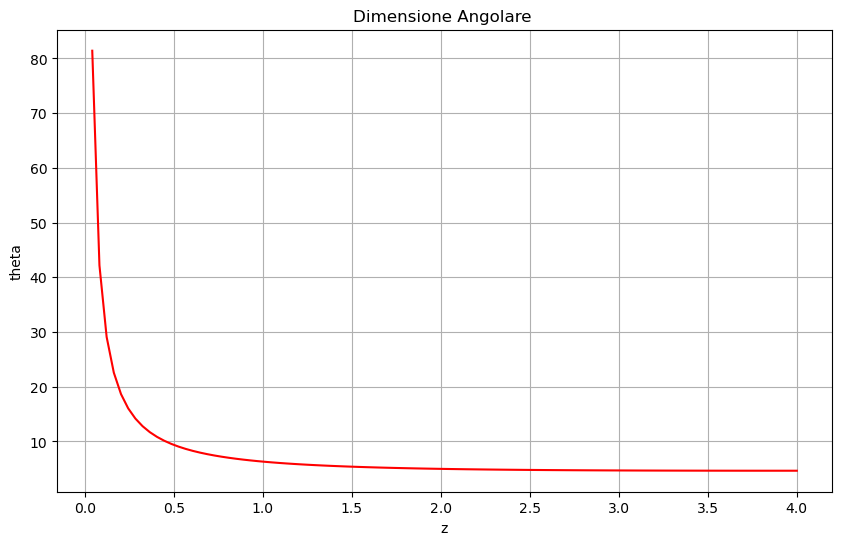

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(z_values, theta, color='red', label='theta')
plt.xlabel('z')
plt.ylabel('theta')
plt.title("Dimensione Angolare ")
plt.grid()
plt.show()

UNIVERSI DOMINATI DA MATERIA E RADIAZIONE 

PRIMO MODO: USO DIRETTAMENTE LA FORMULA DI THETA CALCOLATA A MANO

In [9]:
z_values = np.linspace(0,4,100)

#Inserisco direttamente la formula che ho calcolato a mano
# Dimensione angolare orizzonte in un universo dominato dalla materia
theta_matter = (1 + z_values) / (np.sqrt(1 + z_values) - 1)
# Dimensione angolare orizzonte in un universo dominato dalla radiazione
theta_radiation = (1 + z_values) / z_values

/tmp/ipykernel_4784/3388034453.py:5: RuntimeWarning: divide by zero encountered in divide
  theta_matter = (1 + z_values) / (np.sqrt(1 + z_values) - 1)
/tmp/ipykernel_4784/3388034453.py:7: RuntimeWarning: divide by zero encountered in divide
  theta_radiation = (1 + z_values) / z_values


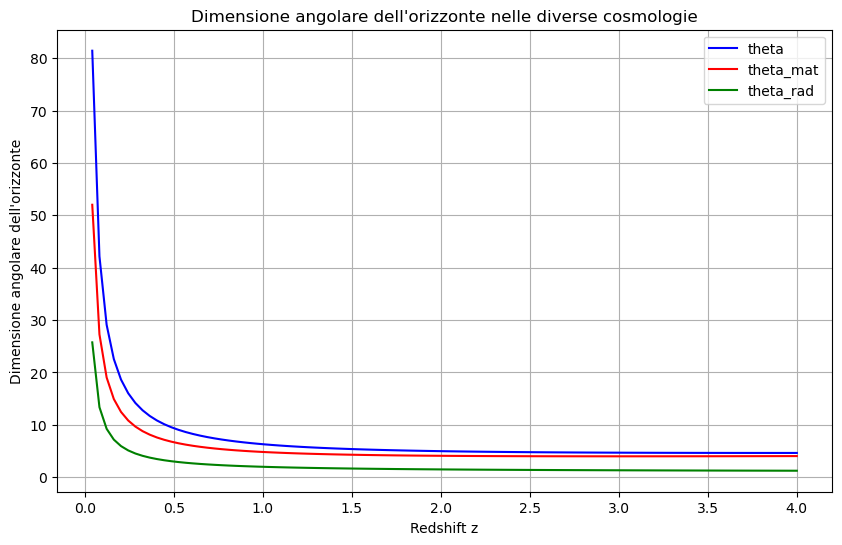

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(z_values, theta, color='blue', label='theta')
plt.plot(z_values, theta_matter, color='red', label='theta_mat')
plt.plot(z_values, theta_radiation, color='green', label='theta_rad')
plt.legend()
plt.xlabel('Redshift z')
plt.ylabel('Dimensione angolare dell\'orizzonte')
plt.title("Dimensione angolare dell'orizzonte nelle diverse cosmologie")
plt.grid()
plt.show()

Osservazioni sul grafico: la curva blu (theta generico) risulta più alta di quelle materia/radiazione dato che un universo con più componenti (materia + radiazione, come il nostro universo reale) ha un orizzonte più grande, quindi una dimensione angolare maggiore (θ più grande).

2 MODO: RIFACCIO IL CASO DI MATERIA E RADIAZIONE FACENDO FARE I CALCOLI DELL'INTEGRALE AL PROGRAMMA

/tmp/ipykernel_4784/1456152766.py:33: RuntimeWarning: divide by zero encountered in divide
  theta_matter = (RH_matter ) / DA_matter
/tmp/ipykernel_4784/1456152766.py:34: RuntimeWarning: divide by zero encountered in divide
  theta_radiation = (RH_radiation ) / DA_radiation


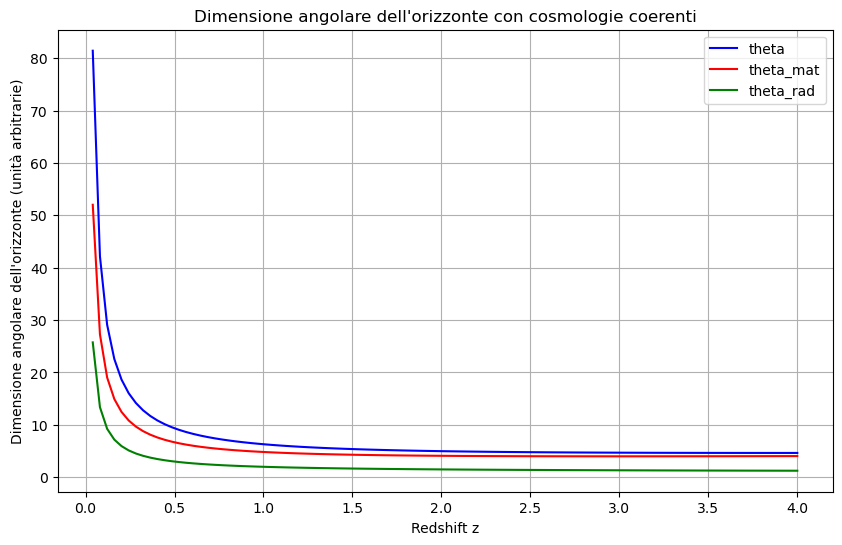

In [11]:
from scipy.integrate import quad
# Costante di Hubble arbitraria (tanto si semplifica nei confronti)
H0 = 1  

# Definizione delle funzioni di H(z), gli universi di materia e radiazione
def H_matter(z):
    return H0 * (1 + z)**1.5
def H_radiation(z):
    return H0 * (1 + z)**2

#Funzioni generiche da implementare per l'universo che si considera(dominato da materia o radiazione)
# Funzione che calcola la distanza di hubble 
def chi(z, H_func):
    integral, _ = quad(lambda zp: 1. / H_func(zp), z, np.inf)
    return integral
# Funzione che calcola la distanza comovente
def r_comov(z, H_func):
    integral, _ = quad(lambda zp: 1. / H_func(zp), 0, z)
    return integral
# Distanza angolare, che è la distanza comovente divisa per (1 + z)
def DA(z, H_func):
    return r_comov(z, H_func) / (1 + z)

# Costruiamo gli array
z_vals = np.linspace(0, 4, 100)

RH_matter = np.array([  chi(z, H_matter) for z in z_vals])
RH_radiation = np.array([ chi(z, H_radiation) for z in z_vals])

DA_matter = np.array([ DA(z, H_matter) for z in z_vals])
DA_radiation = np.array([ DA(z, H_radiation) for z in z_vals])

theta_matter = (RH_matter ) / DA_matter
theta_radiation = (RH_radiation ) / DA_radiation

# Plot
plt.figure(figsize=(10, 6))
plt.plot(z_vals, theta, label="theta", color="blue")
plt.plot(z_vals, theta_matter, label="theta_mat", color="red")
plt.plot(z_vals, theta_radiation, label="theta_rad", color="green")
plt.xlabel("Redshift z")
plt.ylabel("Dimensione angolare dell'orizzonte (unità arbitrarie)")
plt.title("Dimensione angolare dell'orizzonte con cosmologie coerenti")
plt.legend()
plt.grid(True)
plt.show()

    ORA CALCOLO IL TILING DEL CIELO, OVVERO IL NUMERO DI ORIZZONTI NECESSARI PER COPRIRE IL CIELO. QUESTO Dà UNA STIMA DEL NUMERO DI PORZIONI DEL CIELO INDIPENDENTI. 

Se Theta è in rad, l'area del cielo coperta da una patch è pi*(Theta**2). 
Considerando che l'area totale del cielo è 4*pi steradianti, ho che N=(4*pi)/pi*Theta**2.

Numero di patch per theta_matter: [0.         0.00147843 0.00537495 0.01102852 0.0179351  0.02570937
 0.03405642 0.04275054 0.05161927 0.06053126 0.06938705 0.07811198
 0.08665066 0.09496278 0.10301977 0.11080224 0.11829795 0.12550018
 0.13240653 0.1390179  0.14533769 0.15137122 0.15712521 0.16260739
 0.16782622 0.17279062 0.17750978 0.18199303 0.18624971 0.19028908
 0.19412027 0.19775219 0.20119353 0.20445272 0.20753791 0.21045694
 0.21321737 0.21582645 0.21829115 0.22061811 0.2228137  0.224884
 0.22683484 0.22867174 0.2304     0.23202465 0.23355051 0.23498213
 0.23632389 0.23757994 0.23875422 0.23985051 0.24087238 0.24182325
 0.24270638 0.24352485 0.24428162 0.24497949 0.24562115 0.24620912
 0.24674585 0.24723366 0.24767473 0.24807118 0.24842501 0.24873813
 0.24901237 0.24924946 0.24945106 0.24961875 0.24975405 0.2498584
 0.24993318 0.24997969 0.2499992  0.24999291 0.24996196 0.24990745
 0.24983042 0.24973188 0.24961279 0.24947406 0.24931657 0.24914116
 0.24894862 0.24873972 0.248515

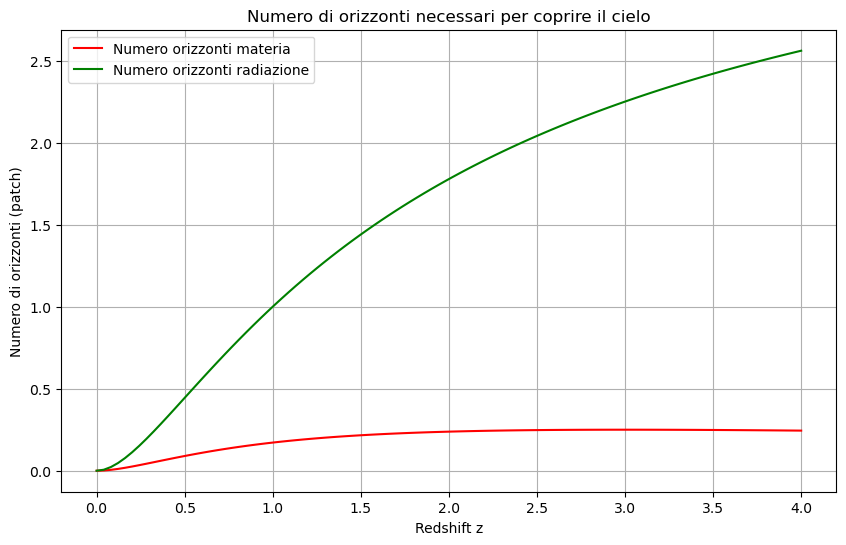

In [12]:
# Funzione per calcolare il numero di orizzonti necessari per coprire il cielo
def calculate_patches(theta):
    return 4 / (theta**2)

# Calcoliamo il numero di patch per ogni valore di theta
#patches= calculate_patches(theta)
patches_mat=calculate_patches(theta_matter)
patches_rad=calculate_patches(theta_radiation)


#print("Numero di patch per theta:", patches)
print("Numero di patch per theta_matter:", patches_mat)
print("Numero di patch per theta_radiation:", patches_rad)
# Grafico del numero di patch in funzione del redshift
plt.figure(figsize=(10, 6))
#plt.plot(z_values, patches, label='Numero orizzonti generici', color='blue')
plt.plot(z_values,patches_mat, label='Numero orizzonti materia', color='red')
plt.plot(z_values,patches_rad, label='Numero orizzonti radiazione', color='green')
plt.xlabel('Redshift z')
plt.ylabel('Numero di orizzonti (patch)')
plt.title("Numero di orizzonti necessari per coprire il cielo")
plt.grid(True)
plt.legend()
plt.show()

ORA CALCOLO LO SCALING DELLA VARIANZA STATISTICA DI TEST

Immaginando di definire una statistica di test su ciascun a patch, ogni patch agisce come un universo indipendente. 
Ho che  la varianza della media campionaria su tutte le patch scala come: sigma**2=1/N(z)=Theta**2.

In [13]:
# Funzione per calcolare la varianza per ciascuna patch
def calculate_patch_variance(theta):
    return theta**2

# Calcoliamo la varianza per ciascun valore di theta (ogni patch rappresenta una regione del cielo)
patch_variance = [calculate_patch_variance(theta) for theta in theta]
patch_variance_matter=[calculate_patch_variance(theta) for theta in theta_matter]
patch_variance_radiation=[calculate_patch_variance(theta) for theta in theta_radiation]

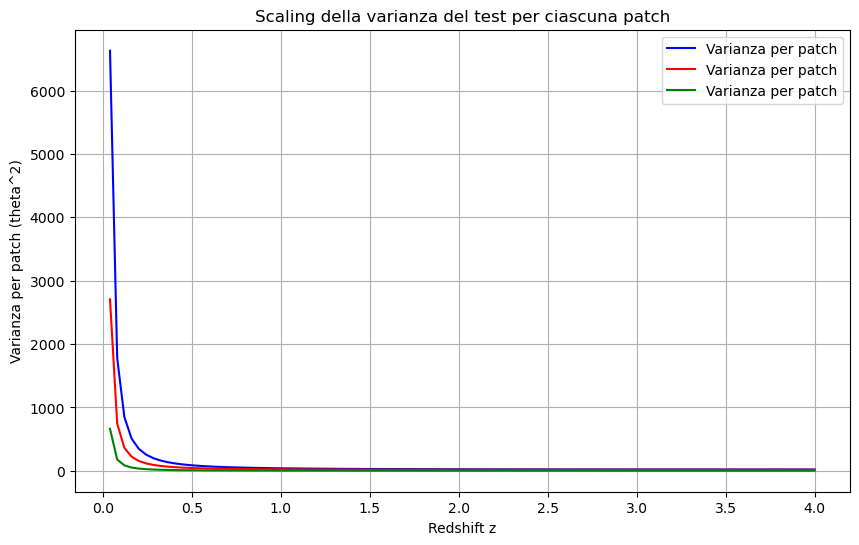

In [14]:
# Grafico della varianza in funzione di z e del numero di patch
plt.figure(figsize=(10, 6))
plt.plot(z_values, patch_variance, label='Varianza per patch', color='blue')
plt.plot(z_values, patch_variance_matter, label='Varianza per patch', color='red')
plt.plot(z_values, patch_variance_radiation, label='Varianza per patch', color='green')
plt.xlabel('Redshift z')
plt.ylabel('Varianza per patch (theta^2)')
plt.title("Scaling della varianza del test per ciascuna patch")
plt.grid(True)
plt.legend()
plt.show()

ESERCIZIO 5 : SCALAR FIELD DYNAMICS

In [15]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parametri
m = 1e-6
t_span = (0, 1e8)
t_eval = np.linspace(*t_span, 1000) 

# Sistema dinamico 
def dynamics_x(t, x):
    x1, x2 = x
    V = 0.5 * m**2 * x1**2
    H = np.sqrt((0.5 * x2**2 + V) / 3)
    dx1dt = x2
    dx2dt = -3 * H * x2 - m**2 * x1
    #dx2dt = -3 * H * x2 
    return [dx1dt, dx2dt]

# Funzioni ausiliarie
def epsilon_x(x1, x2):
    #H = np.sqrt((0.5 * x2**2 + 0.5 * m**2 * x1**2) / 3)
    H_allasec=((0.5*x2**2)+ (0.5*m**2*x1**2))/3
    return x2**2 / (2 * H_allasec)

def Hubble_x(x1, x2):
    return np.sqrt((0.5 * x2**2 + 0.5 * m**2 * x1**2) / 3)

def eta_potential(x1):
    V = 0.5 * m**2 * x1**2
    V_dd = m**2
    return V_dd / (V )
    #return V_dd / (V + 1e-10)

initial_conditions = [
    (10, 0),
    (15, 0),
    (15, 1e-6),
    #(15, 1e-5),  #miglior numero per gli e-folds
    (20, -1e-6),
]

results_x = []
for x1_0, x2_0 in initial_conditions:
    sol = solve_ivp(dynamics_x, t_span, [x1_0, x2_0], t_eval=t_eval, rtol=1e-8)
    x1 = sol.y[0]
    x2 = sol.y[1]
    t = sol.t
    H_vals = Hubble_x(x1, x2)
    eps_vals = epsilon_x(x1, x2)
    eta_vals = eta_potential(x1)
    results_x.append({
        't': sol.t,
        'x1': x1,
        'x2': x2,
        'H': H_vals,
        'epsilon': eps_vals,
        'eta': eta_vals,
        'x1_0': x1_0,
        'x2_0': x2_0
    })

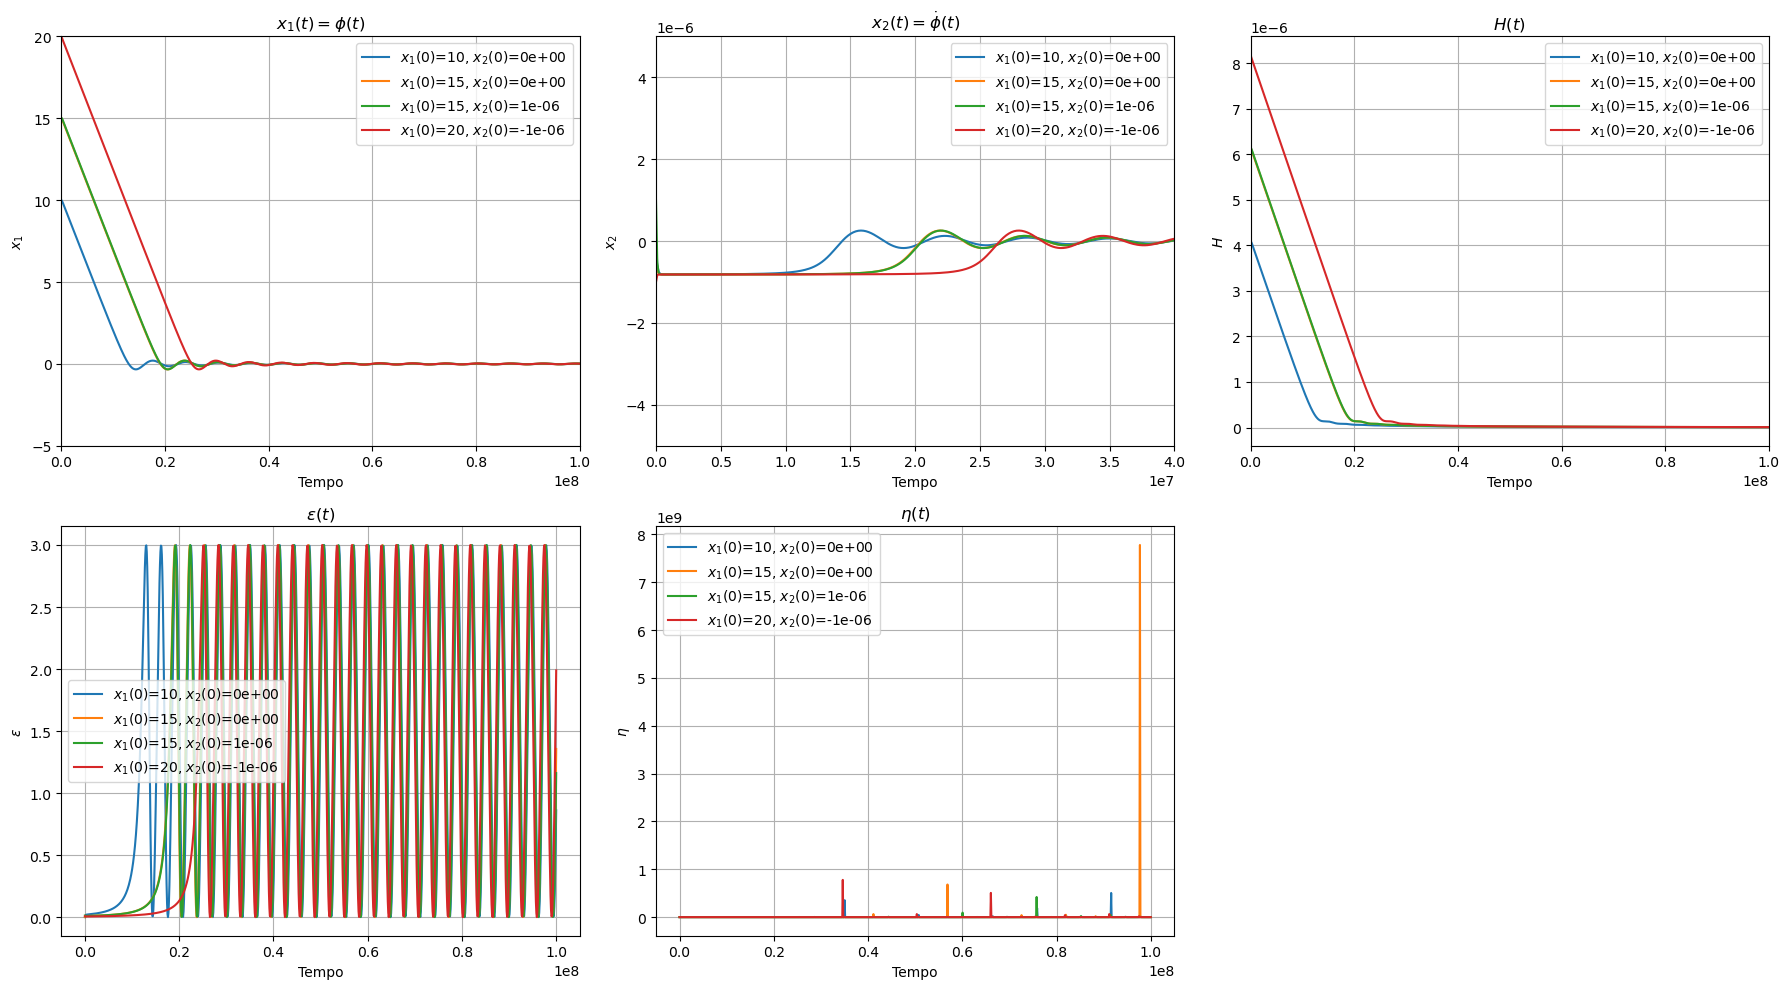

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# x1(t)
for res in results_x:
    axes[0].plot(res['t'], res['x1'], label=f"$x_1(0)$={res['x1_0']}, $x_2(0)$={res['x2_0']:.0e}")
axes[0].set_title(r"$x_1(t) = \phi(t)$")
axes[0].set_xlabel("Tempo")
axes[0].set_ylabel(r"$x_1$")
axes[0].set_ylim(-5, 20)
axes[0].set_xlim(0, 1e8)
axes[0].legend()
axes[0].grid(True)


# x2(t)
for res in results_x:
    axes[1].plot(res['t'], res['x2'], label=f"$x_1(0)$={res['x1_0']}, $x_2(0)$={res['x2_0']:.0e}")
axes[1].set_title(r"$x_2(t) = \dot{\phi}(t)$")
axes[1].set_xlabel("Tempo")
axes[1].set_ylabel(r"$x_2$")
axes[1].set_ylim(-5e-6, 5e-6)
axes[1].set_xlim(0, 0.4*1e8)
axes[1].legend()
axes[1].grid(True)

# H(t)
for res in results_x:
    axes[2].plot(res['t'], res['H'], label=f"$x_1(0)$={res['x1_0']}, $x_2(0)$={res['x2_0']:.0e}")
axes[2].set_title(r"$H(t)$")
axes[2].set_xlabel("Tempo")
axes[2].set_ylabel(r"$H$")
axes[2].set_xlim(0, 1e8)
axes[2].legend()
axes[2].grid(True)

# epsilon(t)
for res in results_x:
    axes[3].plot(res['t'], res['epsilon'], label=f"$x_1(0)$={res['x1_0']}, $x_2(0)$={res['x2_0']:.0e}")
axes[3].set_title(r"$\epsilon(t)$")
axes[3].set_xlabel("Tempo")
axes[3].set_ylabel(r"$\epsilon$")
#axes[3].set_xlim(0, 0.2*1e8)
axes[3].legend()
axes[3].grid(True)

# eta(t)
for res in results_x:
    axes[4].plot(res['t'], res['eta'], label=f"$x_1(0)$={res['x1_0']}, $x_2(0)$={res['x2_0']:.0e}")
axes[4].set_title(r"$\eta(t)$")
axes[4].set_xlabel("Tempo")
axes[4].set_ylabel(r"$\eta$")
axes[4].legend()
axes[4].grid(True)


fig.delaxes(axes[5])  #rimuovo plot numero 6, ne voglio solo5

plt.tight_layout()
plt.show()

ANALISI DEI GRAFICI: 
1) La funzione x1(t) mostra l'evoluzione del campo scalare nel tempo. 
Il campo scalare decresce con il tempo, indicando che l'energia potenziale diminuisce (pallina che cade nella buca).
Tuttavia la discesa deve essere lenta, altrimenti non si ha inflazione.
Quanto lenta? lo si vede dai grafici dopo
Nella fase finale dell'inflazione si ha oscillazioni intorno a 0

2) La funzione x2(t) mostra l'evoluzione della velocità del campo scalare .
All’inizio: piccola (se slow-roll), costante o appena crescente.
Con il tempo: accelera un po’, poi oscilla quando il campo si avvicina a zero, ovvero
quando il potenziale è più basso (fine inflazione e reheating).

3) La funzione H(t) mostra l'evoluzione del param di Hubble.
Decresce lentamente durante l’inflazione, perché phi decresce e con esso e V(phi).

4) La funzione epsilon(t) mostra l'evoluzione del parametro di inflazione.
All'inizio epsilon <<1--> avviene slow-roll ed inflazione, poi cresce e 
per epsilon>1 si ha la fine dell'inflazione. 
In regime non inflazionario si hanno oscillazioni rapide del campo.

5) La funzione eta(t) mostra l'evoluzione della curvatura del potenziale
(ovvero quanto rapidamente varia l'accelerazione del campo).
All'inizio si hanno valori piccoli di eta, quindi curvatura piccola e quindi
potenziale piatto.
Poi eta cresce (il campo cambia accelerazione velocemente)



In [17]:
#calcola il numero di e-folds USANDO ULTIMO PHI_0 INDICATO (20--> N=100, 15--> N=58)

# Verifica se ε supera 1 in qualche punto
epsilon_threshold = 1.0
above_threshold = np.where(eps_vals > epsilon_threshold)[0]

if len(above_threshold) > 0:
    # Primo indice in cui ε > 1 ⇒ fine inflazione
    inflation_end_idx = above_threshold[0]
    # Prendiamo solo l'intervallo inflazionario
    t_inflation = t[:inflation_end_idx + 1]
    H_inflation = H_vals[:inflation_end_idx + 1]
    # Calcolo dell'integrale N = ∫ H dt
    N_efolds = np.trapz(H_inflation, t_inflation)
else:
    # Se ε non supera mai 1, integriamo su tutto l'intervallo
    N_efolds = np.trapz(H_vals, t)

print(f"Numero di e-folds: {N_efolds:.2f}")

Numero di e-folds: 100.56


/tmp/ipykernel_4784/3486141380.py:14: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  N_efolds = np.trapz(H_inflation, t_inflation)
